In [2]:
# 모듈 import

from mmcv import Config
from mmdet.datasets import build_dataset
from mmdet.models import build_detector
from mmdet.apis import train_detector
from mmdet.datasets import (build_dataloader, build_dataset,
                            replace_ImageToTensor)
from mmdet.utils import get_device
import matplotlib.pyplot as plt
import cv2
import numpy as np

/opt/conda/envs/detection/lib/python3.7/site-packages/mmcv/__init__.py:21: UserWarning: On January 1, 2023, MMCV will release v2.0.0, in which it will remove components related to the training process and add a data transformation module. In addition, it will rename the package names mmcv to mmcv-lite and mmcv-full to mmcv. See https://github.com/open-mmlab/mmcv/blob/master/docs/en/compatibility.md for more details.
  'On January 1, 2023, MMCV will release v2.0.0, in which it will remove '


In [11]:
classes = (
    "General trash",
    "Paper",
    "Paper pack",
    "Metal",
    "Glass",
    "Plastic",
    "Styrofoam",
    "Plastic bag",
    "Battery",
    "Clothing",
)

In [32]:
cfg = Config.fromfile('/opt/ml/baseline/level2_objectdetection-cv-03/mmdetection/configs/_teamconfig_/show_transform/coco_detection.py')

In [33]:
dataset = build_dataset(cfg.data.train)

loading annotations into memory...
Done (t=0.07s)
creating index...
index created!


In [34]:
def show_bbox(img, bboxes, labels):
    img = img.copy()
    for bbox, label in zip(bboxes, labels):
        x1, y1, x2, y2 = bbox
        x1, y1, x2, y2 = map(int, [round(x1), round(y1), round(x2), round(y2)])
        img = cv2.rectangle(img, (x1, y1), (x2, y2), (255, 0, 0), 3)
        img = cv2.putText(img, classes[label], (x1, y1 - 5), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)
    return img

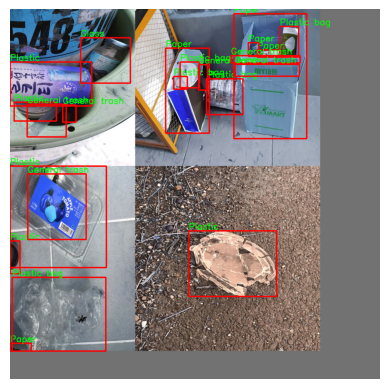

In [35]:
for data in dataset:
    labels = (data['gt_labels'].data).numpy()
    bboxes = (data['gt_bboxes'].data).numpy()
    img = data['img'].data
    img = img.permute(1,2,0)
    np_img = img.numpy().astype('uint8')
    img = show_bbox(np_img, bboxes, labels)
    plt.imshow(img)
    plt.axis('off')
    plt.show()
    break